# Lecture 1: Optimization Using Python

In this lecture / tutorial, we will learn how to solve some simple optimization problems using Python. This involves a brief introduction to the various optimization libraries available, such as ```scipy.optimize```, ```ortools```, and ```cplex```. We will solve an example optimization problem using each library.

***

## Learning goals
- Obtain an overview of optimization problems that can be easily solved using Python.
- Know about some of the popular optimization libraries which have easy to use Python interfaces.
- Learn the syntax to solve some simple optimization problems using at least a couple of the libraries discussed in this tutorial.
- Test your understanding by solving a few of the practice problems in each section.

***
# Prerequisites for running this notebook

You should have Python 3.6 installed on your computer, with all necessary packages installed.

We recommend that you install Anaconda (Python 3.6 version) from the following links depending on your OS:
- For Windows: https://www.anaconda.com/download/#windows
- For macOS: https://www.anaconda.com/download/#macos
- For Linux: https://www.anaconda.com/download/#linux

**If you are not using Anaconda, it is your responsibility to make sure that Python and all necessary packages are correctly installed and configured to be able to run this notebook.**

***

Once Anaconda is installed, open a **Terminal** (if you are using macOS / Linux), or **Anaconda Prompt** (if you are using Windows), and then create a new Python environment called **cme193**, by running the following command:<br>
> ```conda create -n cme193 python=3.6```

Next, change to the newly created virtual environment by running the command:

On Windows
> ```activate cme193``` <br>

On macOS or Linux
> ```source activate cme193```

Next install all the necessary packages by running the following commands:

> ```conda install nb_conda``` <br>
> ```conda install -c anaconda scipy``` <br>
> ```conda install -c conda-forge matplotlib``` <br>

Now navigate to the directory containing this .ipynb file, from inside the terminal, and start jupyter notebook by typing the following command:
> ```jupyter notebook```

You should now be able to launch the .ipynb file from the browser. For more information on jupyter notebooks, read the <a href="https://jupyter-notebook.readthedocs.io/en/stable/notebook.html" style="text-decoration: none;">user documentation</a>.

***
# Introduction to scipy.optimize

In this section we will learn how to solve some simple optimization problems using ```scipy```. The ```scipy.optimize``` package already gives us a lot of basic tools to solve a wide variety of important optimization problems. For more information please read the <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html" style="text-decoration: none;">documentation</a>.

We can import the module as follows (henceforth to be referred to as ```sciopt```). We also import some other modules we will use in this notebook.

In [1]:
import scipy.optimize as sciopt
import numpy as np
import matplotlib.pyplot as plt

***
## Solving a linear program

The first example we will look at is that of solving a **linear program (LP)**. A linear program is any optimization problem of the following form:

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^{T}x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$

where $c, x \in \mathbb{R}^n$, $A_{ub} \in \mathbb{R}^{m \times n}$, $A_{eq} \in \mathbb{R}^{p \times n}$, $b_{ub} \in \mathbb{R}^{m}$, and $b_{eq} \in \mathbb{R}^{p}$. It should be noted that all LP can be put in this form.

```scipy.optimize``` provides a simple function ```scipy.optimize.linprog``` to solve such problems, which is documented <a href="https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog" style="text-decoration: none;">here</a>. Currently, the only available algorithm that is implemented are the **simplex method**, and the **interior point method**. We will demonstrate its usage using a few examples.

***
### Example 1
Let us consider the problem

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0
\end{split}
\end{equation}
$$

In order to solve it, we first need to transform it to the form that ```scipy.optimize.linprog``` requires. The problem is clearly equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& -5 x_1 - x_2 \leq 0
\end{split}
\end{equation}
$$

The following Python code then solves this problem.

In [2]:
# Define problem parameters
c = [1, 2]
A_ub = [[1, 0], [-5, -1]]
b_ub = [1, 0]
bounds = ((None, None), (None, None))

# Solve the LP
result = sciopt.linprog(c=c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

In [3]:
# Print the result
print(result)

     fun: -9.000000000000004
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([ 1., -5.])


***
Notice that we must explicitly set the ```bounds``` parameter in the above problem. If we don't pass this parameter, the default assumption is that the variables are non-negative.

You can additionally pass the parameter ```options={"disp": True}``` to print convergence messages from the solver. **Solver method specific parameters can also be passed as optional parameters in** ```options```.

In [4]:
# Solve the LP and print convergence messages
result = sciopt.linprog(c=c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, options={"disp": True})

Optimization terminated successfully.
         Current function value: -9.000000   
         Iterations: 2


In [5]:
# Extract the solution and print it
obj_optimal = result['fun']
x = result['x']
print("Optimal solution: x1 = ", x[0], ", x2 = ", x[1])
print("Optimal value = ", obj_optimal)

Optimal solution: x1 =  1.0 , x2 =  -5.000000000000002
Optimal value =  -9.000000000000004


***
### Example 2
Let us change the problem by adding an equality constraint

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0 \\
& x_1 + x_2 = 3.
\end{split}
\end{equation}
$$

In order to solve it, we first need to transform it to the form that ```scipy.optimize.linprog``` requires. The problem is clearly equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& -5 x_1 - x_2 \leq 0 \\
& x_1 + x_2 = 3.
\end{split}
\end{equation}
$$

The following Python code then solves this problem.

In [6]:
# Define problem parameters
c = [1, 2]
A_ub = [[1, 0], [-5, -1]]
b_ub = [1, 0]
A_eq = [[1, 1]]
b_eq = [3]
bounds = ((None, None), (None, None))

# Solve the LP
print("Solving the LP")
result = sciopt.linprog(c=c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, options={"disp": True})

# Extract the solution and print it
obj_optimal = result['fun']
x = result['x']
print("\n")
print("Optimal solution: x1 = ", x[0], ", x2 = ", x[1])
print("Optimal value = ", obj_optimal)

Solving the LP
Optimization terminated successfully.
         Current function value: 5.000000    
         Iterations: 2


Optimal solution: x1 =  1.0 , x2 =  2.0
Optimal value =  5.0


#### Alternate way of solving the problem
Notice that the inequality constraint ```x1 <= 1``` is a **bound constraint**. Hence, an alternate way to solve **Example 2** is as follows:

In [7]:
# Define problem parameters
c = [1, 2]
A_ub = [[-5, -1]]
b_ub = [0]
A_eq = [[1, 1]]
b_eq = [3]
bounds = ((None, 1), (None, None))

# Solve the LP
print("Solving the LP")
result = sciopt.linprog(c=c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, options={"disp": True})

# Extract the solution and print it
obj_optimal = result['fun']
x = result['x']
print("\n")
print("Optimal solution: x1 = ", x[0], ", x2 = ", x[1])
print("Optimal value = ", obj_optimal)

Solving the LP
Optimization terminated successfully.
         Current function value: 5.000000    
         Iterations: 2


Optimal solution: x1 =  1.0 , x2 =  2.0
Optimal value =  5.0


***
### Example 3
Some special problems can be reduced to a LP. Consider the following optimization problem

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2 - 3 x_3  \\
\text{subject to} \;\; & |x_1| \leq 1 \\
& |x_2| \leq 2 \\
& |x_3| \leq 1 \\
& x_1 + x_2 + x_3 = 1.
\end{split}
\end{equation}
$$

But this is just equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2 - 3 x_3  \\
\text{subject to} \;\; & -1 \leq x_1 \leq 1 \\
& -2 \leq x_2 \leq 2 \\
& -1 \leq x_3 \leq 1 \\
& x_1 + x_2 + x_3 = 1.
\end{split}
\end{equation}
$$

The following Python code then solves this problem.

In [8]:
# Define problem parameters
c = [1, 2, -3]
A_eq = [[1, 1, 1]]
b_eq = [1]
bounds = ((-1, 1), (-2, 2), (-1, 1))

# Solve the LP
print("Solving the LP")
result = sciopt.linprog(c=c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="interior-point", options={"disp": True})

# Extract the solution and print it
obj_optimal = result['fun']
x = result['x']
print("\n")
print("Optimal solution: x1 = ", x[0], ", x2 = ", x[1], ", x3 = ", x[2])
print("Optimal value = ", obj_optimal)

Solving the LP
Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 -2.0                
0.2580267693811     0.2580267693811     0.2580267693811     0.7472714508774  0.2580267693811     -4.874990060633     
0.02400575024644    0.02400575024644    0.02400575024644    0.9172681112386  0.02400575024644    -3.930935041508     
0.0001908759146977  0.0001908759145871  0.0001908759145884  0.9958556392802  0.0001908759146894  -4.001229925194     
9.555359004043e-09  9.555359095733e-09  9.555358282398e-09  0.9999499421812  9.555358866709e-09  -4.000000061479     
4.773407186698e-13  4.778634535547e-13  4.776179451937e-13  0.9999499968491  4.777679471601e-13  -4.000000000003     
Optimization terminated successfully.


Optimal solution: x1 =  0.9999999999999634 , x2 =  -1.0000000000018114 , x3 =  0.9999999999998039
Optimal value =  -4.00

***
### Example 4
Here is another interesting example. Consider the following optimization problem

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & \max \{|x_1|, |x_2|, |x_3|\}  \\
\text{subject to} \;\; & x_1 + x_2 + x_3 \geq 1.
\end{split}
\end{equation}
$$

It is easy to show that this problem is equivalent to the problem (this is called the **epigraph form** of the problem)

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & s  \\
\text{subject to} \;\; & |x_1| \leq s \\
& |x_2| \leq s \\
& |x_3| \leq s \\
& s \geq 0 \\
& x_1 + x_2 + x_3 \geq 1
\end{split}
\end{equation}
$$

where the minimization is now over the variables $x_1, x_2, x_3,$ and $s$.

As before we need to change this problem into a form that is suitable for ```scipy.optimize.linprog```. The problem can be written equivalently as

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & s  \\
\text{subject to} \;\; & x_1 - s \leq 0 \\
& x_2 - s \leq 0 \\
& x_3 - s \leq 0 \\
& - x_1 - s \leq 0 \\
& - x_2 - s \leq 0 \\
& - x_3 - s \leq 0 \\
& - x_1 - x_2 - x_3 \leq -1 \\
& s \geq 0 .
\end{split}
\end{equation}
$$

The following Python code then solves this problem.

In [9]:
# Define problem parameters
c = [0, 0, 0, 1]
A_ub = [[1, 0, 0, -1], [0, 1, 0, -1], [0, 0, 1, -1], [-1, 0, 0, -1], [0, -1, 0, -1], [0, 0, -1, -1], [-1, -1, -1, 0]]
b_ub = [0, 0, 0, 0, 0, 0, -1]
bounds = ((None, None), (None, None),(None, None), (0, None))

# Solve the LP
print("Solving the LP")
result = sciopt.linprog(c=c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="interior-point", options={"disp": True})

# Extract the solution and print it
obj_optimal = result['fun']
x = result['x']
print("\n")
print("Optimal solution: x1 = ", x[0], ", x2 = ", x[1], ", x3 = ", x[2], ", s = ", x[3])
print("Optimal value = ", obj_optimal)

Solving the LP
Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 1.0                 
0.1929160231033     0.1929160231033     0.1929160231033     0.8097074289665  0.1929160231033     0.7308257137377     
0.006450902537359   0.006450902537359   0.006450902537359   0.9797701682345  0.006450902537359   0.3336302680012     
3.775130950068e-07  3.775130944228e-07  3.775130943962e-07  0.9999416764449  3.775130944919e-07  0.3333334186219     
1.887590085209e-11  1.887565983396e-11  1.887567879777e-11  0.9999499999434  1.887566346212e-11  0.3333333333376     
Optimization terminated successfully.


Optimal solution: x1 =  0.3333333333374885 , x2 =  0.33333333333748894 , x3 =  0.3333333333374887 , s =  0.3333333333375978
Optimal value =  0.3333333333375978


***
### Exercise 1
Compare the efficiency of the **simplex method** and the **interior point method** at solving linear programs, by generating some random LPs, and then solving them using both options. Plot the timing results as a function of problem size.

In [10]:
# Write your solution here

***
## Minimum weight matching in bipartite graphs

Given an (undirected) **complete bipartite graph** $G = (V_1, V_2, E)$, with an edge cost function $C : E \rightarrow \mathbb{R}$, the goal is to find a minimum weight **matching** $M \subset E$ that covers the smaller of the two sets $V_1$ or $V_2$. Thus $V_1$ and $V_2$ need not be of the same sizes. $G$ being complete bipartite graph means that there is an edge $e \in E$ between every pair of vertices $v_1 \in V_1$, and $v_2 \in V_2$. A matching refers to a selection of edges such that no vertex is covered more than once. This problem is also known as the **linear sum assignment** problem.

Let $|V_1| = N_1$, and $|V_2| = N_2$, and without loss of generality assume that $N_1 \leq N_2$. If we index the vertices in $V_1$ by $i$, and those in $V_2$ by $j$, then $e_{ij}$ will refer to the edge between $i$ and $j$, and similarly $C_{ij}$ will refer to the cost of the edge $e_{ij}$. Let $X_{ij}$ be a boolean $\{0,1\}$ variable that indicates whether edge $e_{ij}$ is selected or not. Then our goals can be represented by the following optimization problem:

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & \sum_{i=1}^{N_1} \sum_{j=1}^{N_2} C_{ij} X_{ij}  \\
\text{subject to} \;\; & X_{ij} \in \{0, 1\}, \;\; \forall \;\; i, j \\
& \sum_{j=1}^{N_2} X_{ij} = 1, \;\; \forall \;\; i \\
& \sum_{i=1}^{N_1} X_{ij} \leq 1, \;\; \forall \;\; j.
\end{split}
\end{equation}
$$

```scipy.optimize``` provides an inbuilt function ```scipy.optimize.linear_sum_assignment``` that solves exactly this problem, which is documented <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html#scipy.optimize.linear_sum_assignment" style="text-decoration: none;">here</a>. The algorithm used to solve this problem is the famous **Hungarian algorithm**, also known as the **Kuhn-Munkres algorithm**, although it was discovered in 2006 that <a href="https://en.wikipedia.org/wiki/Carl_Gustav_Jacob_Jacobi" style="text-decoration: none;">Carl Gustav Jacobi</a> had solved the problem in 1840s (published only posthumously in 1890).

***
Let us see an example.

### Example 1
Consider the following $C$ matrix

$$
C = 
\begin{bmatrix}
2 & 1 & -1 & 1 \\
4 & 5 & -2 & -3 \\
1 & 2 & -1 & 5 \\
-2 & 3 & 4 & 0
\end{bmatrix}
\;\;.
$$

This problem is easily solved using the following Python code.

In [11]:
# Define problem parameters
cost_matrix = [[2, 1, -1, 1], [4, 5, -2, -3], [1, 2, -1, 5], [-2, 3, 4, 0]]

# Solve the linear sum assignment problem
print("Solving the linear sum assignment problem")
row_ind, col_ind = sciopt.linear_sum_assignment(cost_matrix=cost_matrix)

# Print the solution
print("\n")
print("Row index : ", row_ind)
print("Col index : ", col_ind)

# Print selected edges and the costs
print("\n")
print("The selected edges in the optimal assignment and their costs are:")
cost_opt = 0
for ind, row in enumerate(row_ind):
    col = col_ind[ind]
    cost_opt += cost_matrix[row][col]
    print("Edge (" + str(row) + "," + str(col) + ") , Cost = " + str(cost_matrix[row][col]))

# Print optimal cost
print("\n")
print("The optimal cost is : ", cost_opt)

Solving the linear sum assignment problem


Row index :  [0 1 2 3]
Col index :  [1 3 2 0]


The selected edges in the optimal assignment and their costs are:
Edge (0,1) , Cost = 1
Edge (1,3) , Cost = -3
Edge (2,2) , Cost = -1
Edge (3,0) , Cost = -2


The optimal cost is :  -5


***
### Example 2

Consider the following $C$ matrix

$$
C = 
\begin{bmatrix}
2 & 1 & -1 & 1 \\
4 & 5 & -2 & -3 \\
1 & 2 & -1 & 5
\end{bmatrix}
\;\;.
$$

This problem is easily solved using the following Python code.

In [12]:
# Define problem parameters
cost_matrix = [[2, 1, -1, 1], [4, 5, -2, -3], [1, 2, -1, 5]]

# Solve the linear sum assignment problem
print("Solving the linear sum assignment problem")
row_ind, col_ind = sciopt.linear_sum_assignment(cost_matrix=cost_matrix)

# Print the solution
print("\n")
print("Row index : ", row_ind)
print("Col index : ", col_ind)

# Print selected edges and the costs
print("\n")
print("The selected edges in the optimal assignment and their costs are:")
cost_opt = 0
for ind, row in enumerate(row_ind):
    col = col_ind[ind]
    cost_opt += cost_matrix[row][col]
    print("Edge (" + str(row) + "," + str(col) + ") , Cost = " + str(cost_matrix[row][col]))

# Print optimal cost
print("\n")
print("The optimal cost is : ", cost_opt)

Solving the linear sum assignment problem


Row index :  [0 1 2]
Col index :  [2 3 0]


The selected edges in the optimal assignment and their costs are:
Edge (0,2) , Cost = -1
Edge (1,3) , Cost = -3
Edge (2,0) , Cost = 1


The optimal cost is :  -3


***
## Root finding problems - univariate rootfinding

```scipy.optimize``` provides a bunch of functions for finding the roots of a **continuous** univariate function $f$. $x$ is a root of $f$ if and only if $f(x) = 0$. We illustrate some of the important ones with an example.

Consider the function $f(x) = x^4 - x^2$. The function has 3 roots ${-1,0,1}$. The function is graphed below.

Text(0,0.5,'$x^4 - x^2$')

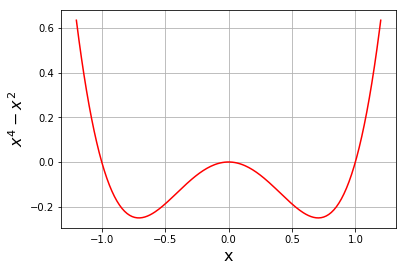

In [13]:
%matplotlib inline

def func(x):
    return x**4 - x**2

step = 0.01
max_x = 1.2
x = np.arange(-max_x, max_x + step, step)
y = func(x)

plt.plot(x, y, "-r")
plt.grid()
plt.xlabel("x", fontsize=16)
plt.ylabel("$x^4 - x^2$", fontsize=16)

The important functions in ```scipy.optimize``` for finding the roots of $f$ can be divided into two categories:
- **Root finding on an interval**: Requires that an interval $[a,b]$ be specified such that $f(a)f(b) < 0$, i.e. the function has different signs at the end points of the interval. The methods that can be used in this setting are ```scipy.optimize.brentq```, ```scipy.optimize.brenth```, ```scipy.optimize.bisect```, ```scipy.optimize.ridder```.
- **Root finding near a point**: Requires a starting point $x_0$. The method that can be used in this setting is ```scipy.optimize.newton```.

More information on these methods can be obtained by clicking on each of these functions, starting from the <a href="https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize" style="text-decoration: none;">documentation page</a> for ```scipy.optimize```.

***
### Root finding in an interval
Let us first try to search for a root in the interval $[-1.5, 0.5]$ using the different methods, and print some performance metrics related to convergence.

In [14]:
# Set a, b
a = -1.5
b = 0.5

# Solve using different methods
root1, result1 = sciopt.brentq(f=func, a=a, b=b, full_output=True, disp=True)
root2, result2 = sciopt.brenth(f=func, a=a, b=b, full_output=True, disp=True)
root3, result3 = sciopt.ridder(f=func, a=a, b=b, full_output=True, disp=True)
root4, result4 = sciopt.bisect(f=func, a=a, b=b, full_output=True, disp=True)

# Print messages
print("\n\nbrentq method results\n")
print("Root detected at x = ", root1)
print("Performance parameters:")
print(result1)

print("\n\nbrenth method results\n")
print("Root detected at x = ", root2)
print("Performance parameters:")
print(result2)

print("\n\nridder method results\n")
print("Root detected at x = ", root3)
print("Performance parameters:")
print(result3)

print("\n\nbisect method results\n")
print("Root detected at x = ", root4)
print("Performance parameters:")
print(result4)



brentq method results

Root detected at x =  -1.0000000000000588
Performance parameters:
      converged: True
           flag: 'converged'
 function_calls: 68
     iterations: 67
           root: -1.0000000000000588


brenth method results

Root detected at x =  -1.0
Performance parameters:
      converged: True
           flag: 'converged'
 function_calls: 67
     iterations: 66
           root: -1.0


ridder method results

Root detected at x =  -1.0000000000009923
Performance parameters:
      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 7
           root: -1.0000000000009923


bisect method results

Root detected at x =  -1.0
Performance parameters:
      converged: True
           flag: 'converged'
 function_calls: 4
     iterations: 2
           root: -1.0


***
### Exercise 2
Try different values of $[a,b]$ and check the performance comparison as above.

In [15]:
# Write your code here

***
### Root finding near a point
Next let us try to search for a root of the same function $f(x) = x^4 - x^2$ near a point, using the Newton algorithm. The Newton algorithm ```scipy.optimize.newton``` can take in optional parameters which are the first and second derivatives of the function. When derivatives are not provided the **secant method** is used. When the first derivative is provided, the algorithm used is called **Newton-Raphson**. When both first and second derivatives are provided, the algorithm used is called **Halley's algorithm**.

**Note: It is very important to check the result $x$ from this algorithm, i.e, if $f(x) = 0$, as convergence is only guaranteed when one starts near a zero**.

We first code up the function first and second derivatives.

In [16]:
def func_prime(x):
    return 4 * (x ** 3) - 2 * x

def func_prime2(x):
    return 12 * (x ** 2) - 2

Let us see the effect of running these different algorithms for finding a root of our function, starting from the point $x_0 = 0.5$.

In [17]:
# Define starting point
x0 = 0.5

# Solve using secant method
root_secant = sciopt.newton(func=func, x0=x0)

# Solve using Newton-Rapheson method
root_newton = sciopt.newton(func=func, x0=x0, fprime=func_prime)

# Solve using Halley's method
root_halley = sciopt.newton(func=func, x0=x0, fprime=func_prime, fprime2=func_prime2)

# Print results
print("\nPrinting the roots :")
print("Secant method : ", root_secant)
print("Newton-Rapheson method : ", root_newton)
print("Halley's method : ", root_halley)


Printing the roots :
Secant method :  1.7614525405214752e-08
Newton-Rapheson method :  1.4586678995097246e-08
Halley's method :  5.324162359300112e-09


***
### Exercise 3
Try different values of $x_0$ and check what happens with each root finding method. Do you see something strange for $x_0 = 0.7$? If yes, can you explain it?

In [18]:
# Write your code here

***
## Root finding problems - multivariate rootfinding

We now turn to the much harder problem of finding zeros of functions of the form  $f : \mathbb{R}^m \rightarrow \mathbb{R}^n$. ```scipy.optimize``` provides a single function ```scipy.optimize.root```, through which all the other functions listed in the <a href="https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize" style="text-decoration: none;">documentation page</a> for multivariate root finding are accessible. All the algorithms require an initial guess (or starting point) $x_0$. The syntax for the function ```scipy.optimize.root``` can be found <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root" style="text-decoration: none;">here</a>.

The important parameters that this function accepts, and about which you should be aware of are:
- ```fun```: A function that implements $f$. The function can optionally return the Jacobian as well.
- ```x0```: Initial guess.
- ```method```: The type of solver to use. Options include ```hybr```, ```krylov```, ```broyden1``` etc.
- ```jac```: Either a ```bool```, or a callable function that returns the Jacobian. In this case, it must accept the same arguments as fun.
- ```options```: A dictionary with optional arguments for the solver ```method```.

**Note:** If ```jac``` is a Boolean and is True, ```fun``` is assumed to return the value of Jacobian along with the objective function. If False, the Jacobian will be estimated numerically. Also one should be aware that many methods do not need the Jacobian implemented; they approximate the Jacobian internally.

We will learn to use some of the features of ```scipy.optimize.root``` using an example.

***
### Example 1
Consider the function $f : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ defined as

$$
f(x,y) = ((x - x_t)^2 - (y - y_t)^2, 2(x - x_t)(y - y_t)),
$$

for some $(x_t, y_t) \in \mathbb{R}^2$.

Alternatively you can also think of this function as $f : \mathbb{C} \rightarrow \mathbb{C}$, defined as $f(z) = (z - z_t)^2$, where $z = x + i y$, and $z_t = x_t + i y_t$. Clearly this function has only one root $z = z_t$, i.e. $(x, y) = (x_t, y_t)$.

Let us code up the function and its Jacobian. The Jacobian is given by

$$
J(x,y) = 
\begin{bmatrix}
2(x - x_t) & 2(y - y_t) \\
-2(y - y_t) & 2(x - x_t)
\end{bmatrix}
.
$$

Set $x_t = 1, y_t = 1$.

In [19]:
# Define xt, yt
xt = 1
yt = 1

# Define the function
def fun(x):
    return [(x[0] - xt) ** 2 - (x[1] - yt) ** 2, 2 * (x[0] - xt) * (x[1] - yt)]

# Define the Jacobian
def jac(x):
    return [[2 * (x[0] - xt), 2 * (x[1] - yt)], [-2 * (x[1] - yt), 2 * (x[0] - xt)]]

# Define the function that also returns the Jacobian
def fun1(x):
    return (
        [(x[0] - xt) ** 2 - (x[1] - yt) ** 2, 2 * (x[0] - xt) * (x[1] - yt)], 
        [[2 * (x[0] - xt), 2 * (x[1] - yt)], [-2 * (x[1] - yt), 2 * (x[0] - xt)]]
    )

Define a starting guess of the root $(x_0, y_0) = (0.5, 0.5)$, and lets demonstrate how the Jacobian can be passed.

In [20]:
# Define starting guess
x0 = [0.5, 0.5]

# Demonstrate usage using different ways to supply function and Jacobian

print("Method 1", "\n")
sol = sciopt.root(fun=fun1, x0=x0, jac=True, method='hybr')
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

print("Method 2", "\n")
sol = sciopt.root(fun=fun, x0=x0, jac=False, method='hybr')
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

print("Method 3", "\n")
sol = sciopt.root(fun=fun, x0=x0, jac=jac, method='hybr')
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

Method 1 

    fjac: array([[ 0.98400183,  0.17815833],
       [-0.17815833,  0.98400183]])
     fun: array([3.09280704e-17, 1.47994165e-17])
 message: 'The solution converged.'
    nfev: 60
    njev: 3
     qtf: array([1.05477780e-16, 2.65636348e-17])
       r: array([-2.93722421e-08,  2.88725167e-08, -2.92569278e-08])
  status: 1
 success: True
       x: array([0.99999999, 1.        ]) 

Solution : x =  0.9999999942897184 , y =  0.999999998704143 



Method 2 

    fjac: array([[-1.00000000e+00, -1.26928271e-15],
       [ 1.26928271e-15, -1.00000000e+00]])
     fun: array([0.0000000e+00, 2.2186713e-31])
 message: 'The solution converged.'
    nfev: 75
     qtf: array([-1.12644845e-45, -8.87468518e-31])
       r: array([ 9.99999993e-01, -9.99999993e-01,  2.92304139e-15])
  status: 1
 success: True
       x: array([1., 1.]) 

Solution : x =  0.9999999999999997 , y =  0.9999999999999997 



Method 3 

    fjac: array([[ 0.98400183,  0.17815833],
       [-0.17815833,  0.98400183]])
     

***
### Exercise 4
1. Try different values of the starting guess $(x_0, y_0)$, and see the impact on performance, as measured by the number of function and Jacobian evaluations.
2. Repeat the experiment with different values of $(x_t, y_t)$. What happens as you approach $x_t = 0, y_t = 0$?

In [21]:
# Write your code here

***
### Example 2
Consider the following system of nonlinear equations

$$
\begin{split}
x + \frac{(x - y)^3}{2} - 1 &= 0 \\
\frac{(y - x)^3}{2} + y &= 0 \;.
\end{split}
$$

We can try to solve this system by trying to find the roots of the function $f : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ defined as

$$
f(x,y) = \left( x + \frac{(x - y)^3}{2} - 1, \frac{(y - x)^3}{2} + y \right).
$$

We code up the function, its Jacobian, and solve the problem using a few different methods.

In [22]:
# Define the function
def fun_nonlinear_eq(x):
    return [x[0] + 0.5 * ((x[0] - x[1]) ** 3) - 1, 0.5 * ((x[1] - x[0]) ** 3) + x[1]]

# Define the Jacobian
def jac_nonlinear_eq(x):
    return [
        [1 + 1.5 * ((x[0] - x[1]) ** 2), -1.5 * ((x[1] - x[0]) ** 2)], 
        [-1.5 * ((x[0] - x[1]) ** 2), 1 + 1.5 * ((x[1] - x[0]) ** 2)]
    ]

# Define starting guess
x0 = [1, 1]

# Solve using method 'hybr'
name = 'hybr'
print("Method " + name, "\n")
sol = sciopt.root(fun=fun_nonlinear_eq, x0=x0, jac=jac_nonlinear_eq, method=name)
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

# Solve using method 'lm'
name = 'lm'
print("Method " + name, "\n")
sol = sciopt.root(fun=fun_nonlinear_eq, x0=x0, jac=jac_nonlinear_eq, method=name)
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

# Methods below do not use Jacobian -- should throw an warning if Jacobian is passed

# Solve using method 'broyden1'
name = 'broyden1'
print("Method " + name, "\n")
sol = sciopt.root(fun=fun_nonlinear_eq, x0=x0, jac=jac_nonlinear_eq, method=name)
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

# Solve using method 'anderson'
name = 'anderson'
print("Method " + name, "\n")
sol = sciopt.root(fun=fun_nonlinear_eq, x0=x0, method=name)
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

# Solve using method 'krylov'
name = 'krylov'
print("Method " + name, "\n")
sol = sciopt.root(fun=fun_nonlinear_eq, x0=x0, method=name)
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

Method hybr 

    fjac: array([[ 0.95527545, -0.29571744],
       [ 0.29571744,  0.95527545]])
     fun: array([-1.11022302e-16,  2.77555756e-17])
 message: 'The solution converged.'
    nfev: 10
    njev: 1
     qtf: array([-1.11891287e-11,  5.89928428e-12])
       r: array([ 1.51616686, -1.4821053 ,  1.5807719 ])
  status: 1
 success: True
       x: array([0.8411639, 0.1588361]) 

Solution : x =  0.8411639019140096 , y =  0.15883609808599033 



Method lm 

   cov_x: array([[0.58704377, 0.41295623],
       [0.41295623, 0.58704377]])
    fjac: array([[-1.83633283, -0.38029971],
       [ 1.29176924, -1.30516302]])
     fun: array([-1.11022302e-16,  2.77555756e-17])
    ipvt: array([1, 2], dtype=int32)
 message: 'The relative error between two consecutive iterates is at most 0.000000'
    nfev: 7
    njev: 6
     qtf: array([-1.85329897e-10,  7.73266306e-11])
  status: 2
 success: True
       x: array([0.8411639, 0.1588361]) 

Solution : x =  0.8411639019140096 , y =  0.1588360980859903

C:\Anaconda3\envs\cme193\lib\site-packages\scipy\optimize\_root.py:209: RuntimeWarning: Method broyden1 does not use the jacobian (jac).
  RuntimeWarning)


     fun: array([0.19069831, 0.08409976])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 300
  status: 2
 success: False
       x: array([1.        , 0.27479807]) 

Solution : x =  1.0 , y =  0.2747980741784015 





***
### Exercise 5
1. Increase the maximum number of iterations for the 'krylov' method and see if there is an impact on the solution.
2. Try different starting guesses for $(x_0, y_0)$, for e.g. try $(0.8, 0.2)$ for the 'krylov' method. Does it help?

In [23]:
# Write your code here

***
## Fixed point iterations

```scipy.optimize``` provides a special function ```scipy.optimize.fixed_point``` for finding fixed points of functions of the form $f : \mathbb{R}^m \rightarrow \mathbb{R}^m$. $x \in \mathbb{R}^m$ is a fixed point of $f$ if and only if $f(x) = x$. The syntax for the function ```scipy.optimize.fixed_point``` can be found <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html#scipy.optimize.fixed_point" style="text-decoration: none;">here</a>.

There are two main algorithms which are supported by this function: ```iteration``` and ```del2```. The default method is ```del2``` which uses Steffensen’s Method with Aitken’s convergence acceleration. The ```iteration``` method simply iterates the function until convergence is detected, without attempting to accelerate the convergence.

We demonstrate the usage of this method with a few examples.

***
### Example 1
Let us consider the problem of finding a solution to the equation $\sin (\alpha x) = \beta x$, for $\alpha, \beta \in \mathbb{R}$. The roots of this equation can be expressed as fixed points of the function $f(x) = \frac{\sin (\alpha x)}{\beta}$.

Let us plot the functions $\sin(\alpha x)$ and $\beta x$ below. You can change $\alpha$ and $\beta$ and see the changes in the plots.

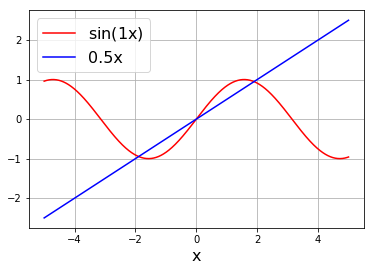

In [24]:
%matplotlib inline

alpha = 1
beta = 0.5

step = 0.01
max_x = 5
x = np.arange(-max_x, max_x + step, step)
y1 = np.sin(alpha * x)
y2 = beta * x

plt.plot(x, y1, "-r", label="$\sin$(" + str(alpha) + "x)")
plt.plot(x, y2, "-b", label=str(beta) + "x")
plt.grid()
plt.xlabel("x", fontsize=16)
plt.legend(fontsize=16)

The following code solves the problem for $\alpha = 1, \beta = 1$, with a starting guess $x_0 = 0.5$.

In [25]:
# Define the function
def func_sinx(x, alpha, beta):
    return np.sin(alpha * x) / beta

# Define alpha, beta
alpha = 1
beta = 1

# Define initial guess
x0 = 0.5

# Solve
fp = sciopt.fixed_point(func=func_sinx, x0=x0, args=(alpha, beta), method="del2")

# Print result
print("Fixed point detected : x = ", fp)

Fixed point detected : x =  0.00012560345075422456


***
### Exercise 6
Experiment with different values of $\alpha, \beta, x_0$ in the above example.

In [26]:
# Write your code here

***
### Example 2
Consider the function $f : \mathbb{R}^2 \rightarrow \mathbb{R}^2$, defined as

$$
f(x_1, x_2) = \left( \frac{a_1}{x_1 + b_1}, \frac{a_2}{x_2 + b_2} \right),
$$

for some $a_1, b_1, a_2, b_2 \in \mathbb{R}$.

The following Python code finds a fixed point of $f$ for $a_1 = 10, b_1 = 3, a_2 = 12, b_2 = 5$, and starting guess $(0,0)$. You can vary these parameters and see the changes in the solution.

In [27]:
# Define the function
def func_fixed_point(x, a, b):
    return np.sqrt(a / (x + b))

# Define the parameters
a = [10, 12]
b = [3, 5]

# Define starting guess
x0 = [0, 0]

# Solve the problem
fp = sciopt.fixed_point(func=func_fixed_point, x0=x0, args=(a, b), method="del2")

# Print result
print("Fixed point detected : x1 = ", fp[0], ", x2 = ", fp[1])

Fixed point detected : x1 =  1.4920333011718168 , x2 =  1.3722813232690143


***
### Exercise 7
1. Formulate the above example as a multivariate root finding problem and solve it.
2. Formulate the above example as a scalar root finding problem and solve it.
3. Compare the performance of the two strategies.

In [28]:
# Write your code here

***
# Local optimization